## LetsGrowMore Data Science Internship Task 1 - Archit Gupta

Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [1]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing SVM from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
%matplotlib inline

In [4]:
# Reading the CSV File as DataFrames using Pandas
df=pd.read_csv('C:/Users/ARCHIT/Desktop/LetsGrowMore/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking the Unique Species
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Shape of dataset
df.shape

(150, 6)

#### Label Encoding 

In [7]:
#Encoding the Species in the dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

In [8]:
#Checking for any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Visualization EDA

D:\program files(D)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


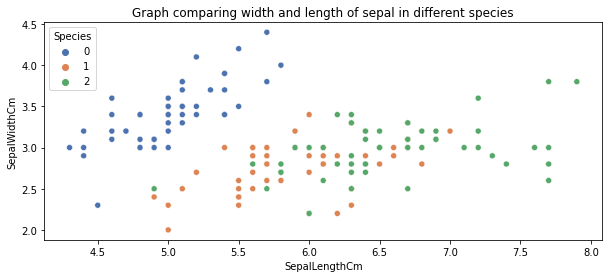

In [9]:
#Graph comparing width and length of sepal in different species
plt.figure(figsize=(10,4))
plt.title('Graph comparing width and length of sepal in different species')
sns.scatterplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

D:\program files(D)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


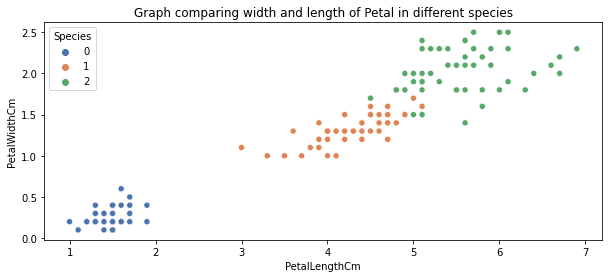

In [10]:
#Graph comparing width and length of Petal in different species
plt.figure(figsize=(10,4))
plt.title('Graph comparing width and length of Petal in different species')
sns.scatterplot(df['PetalLengthCm'], df['PetalWidthCm'],hue=df['Species'],palette='deep')
plt.show()

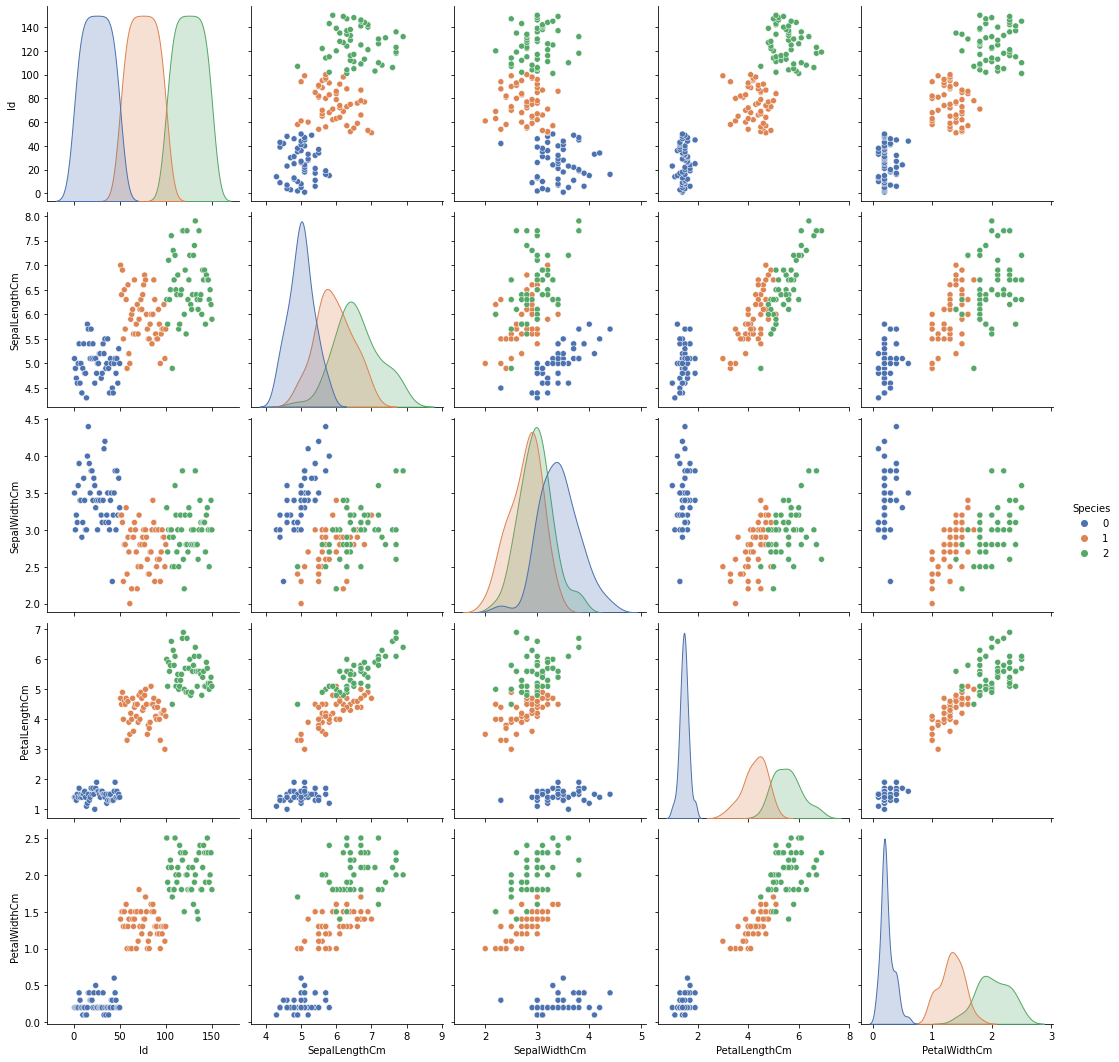

In [11]:
#Pairplot of Species
sns.pairplot(df,hue="Species",height=3,palette='deep')

<AxesSubplot:>

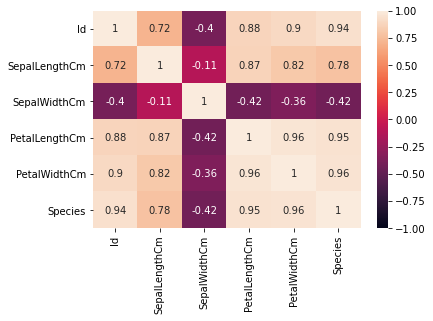

In [12]:
#correlation between features
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [13]:
#Seperating Dependent and Independent Features

#For Dependent feature we use 'y' variable
y=df['Species']

#For Indenpendent feature we use 'x' variable
#Dependent variable has been dropped from 'df'
x=df.drop(['Id','Species'],axis=1)

In [14]:
#shape of 'x' and 'y'
x.shape,y.shape

((150, 4), (150,))

In [15]:
#Spliting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
#Training svm on the training dataset
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [17]:
#Predicting the output on test dataset
y_pred=clf.predict(x_test)

In [18]:
#Storing the actual expected values in y_Actual
y_actual=np.array(y_test)

In [19]:
#Checking the accuracy by comparing the output with the expected output
print(np.round(clf.score(x_test,y_test)*100,2),'%')

97.78 %


In [20]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [21]:
#Classification Report
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### By using the SVM, I got an accuracy of 97.78%.